# 概率

In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

从概率分布中抽取样本的过程称为*抽样*sampling, 可以把分布看作对事件的概率分配。
将概率分配给一些离散选择的分布被称为多项分布 multinomial distribution

In [3]:
fair_probs = torch.ones([6]) / 6
fair_probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [12]:
# Multinomial(total_count, probs, logits, validate_args)
# total_count: 单次抽样中样本的个数
# probs: 每个事件发生的概率
# logits: 每个事件的对数概率
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1730, 0.1650, 0.1700, 0.1520, 0.1730, 0.1670])

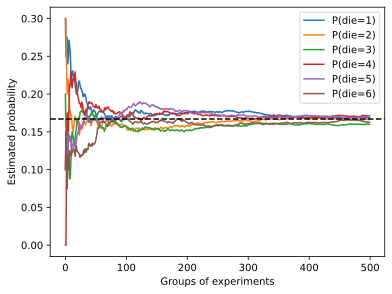

In [25]:
# 做500组实验，每组抽取10个样本
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdim=True)
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();